In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_excel('SMA_IPA.xlsx')
df2 = pd.read_excel('SMA_BAHASA.xlsx')
df3 = pd.read_excel('SMA_IPS.xlsx')
df4 = pd.read_excel('SMA_ISLAM.xlsx')
df5 = pd.read_excel('SMA_KATOLIK.xlsx')
df6 = pd.read_excel('SMA_KRISTEN.xlsx')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [5]:
df = df.drop(df.index[0])
df = df[df['RERATA NILAI'] != '-']

In [6]:
pd.to_numeric(df['RERATA NILAI']).describe()

count    1675.000000
mean       48.199940
std         7.608291
min        23.350000
25%        42.680000
50%        47.310000
75%        52.930000
max        80.130000
Name: RERATA NILAI, dtype: float64

# Persebaran Sekolah Berdasarkan Nilai Berdasarkan RERATA NILAI

In [7]:
kat_A = df[df['RERATA NILAI'] > 52.920000]

kat_B = df[df['RERATA NILAI'] < 52.920000]
kat_B = df[df['RERATA NILAI'] > 47.295000]

kat_C = df[df['RERATA NILAI'] < 47.295000]
kat_C = df[df['RERATA NILAI'] > 42.680000]

kat_D = df[df['RERATA NILAI'] < 42.680000]

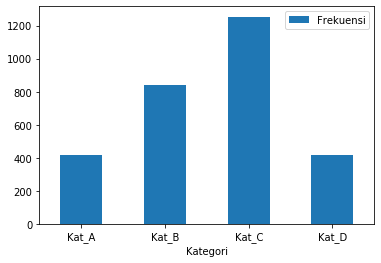

In [8]:
data = pd.DataFrame({'Kategori':['Kat_A', 'Kat_B', 'Kat_C', 'Kat_D'], 'Frekuensi':[kat_A['RERATA NILAI'].count(), kat_B['RERATA NILAI'].count(), kat_C['RERATA NILAI'].count(), kat_D['RERATA NILAI'].count()]})
ax = data.plot.bar(x='Kategori', y='Frekuensi', rot=0)

# ANALISIS PROVINSI TERTINGGI

In [53]:
dfpro1 = pd.read_excel('PROV_IPA.xlsx')
dfpro2 = pd.read_excel('PROV_BAHASA.xlsx')
dfpro3 = pd.read_excel('PROV_IPS.xlsx')
dfpro4 = pd.read_excel('PROV_KEAGAMAAN.xlsx')
dfpro5 = pd.read_excel('PROV_KATOLIK.xlsx')
dfpro6 = pd.read_excel('PROV_PROTESTAN.xlsx')

dfpro = pd.concat([dfpro1,dfpro2,dfpro3,dfpro4,dfpro5,dfpro6])

#dfpro.head()

In [54]:
dfpro = dfpro.dropna()
dfpro = dfpro[dfpro['RERATA NILAI'] != '-']
dfpro['RERATA NILAI'] = dfpro['RERATA NILAI'].astype(float)
dfpro.describe()

,NO,KODE,RERATA NILAI
count,161.000000,161.000000,161.000000
mean,17.341615,17.341615,48.604969
std,9.907135,9.907135,6.366131
min,1.000000,1.000000,35.220000
25%,9.000000,9.000000,44.370000
50%,17.000000,17.000000,47.930000
75%,25.000000,25.000000,52.550000
max,34.000000,34.000000,67.690000


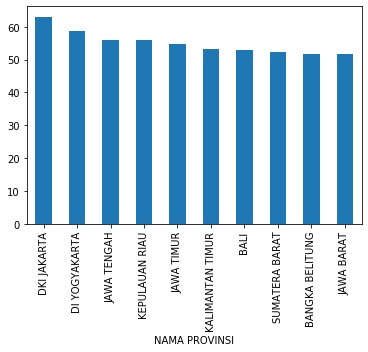

In [76]:
dfpro.groupby(['NAMA PROVINSI']).mean()['RERATA NILAI'].sort_values(ascending = False).head(10).plot(kind='bar')
#dfpro.sort_values('RERATA NILAI')

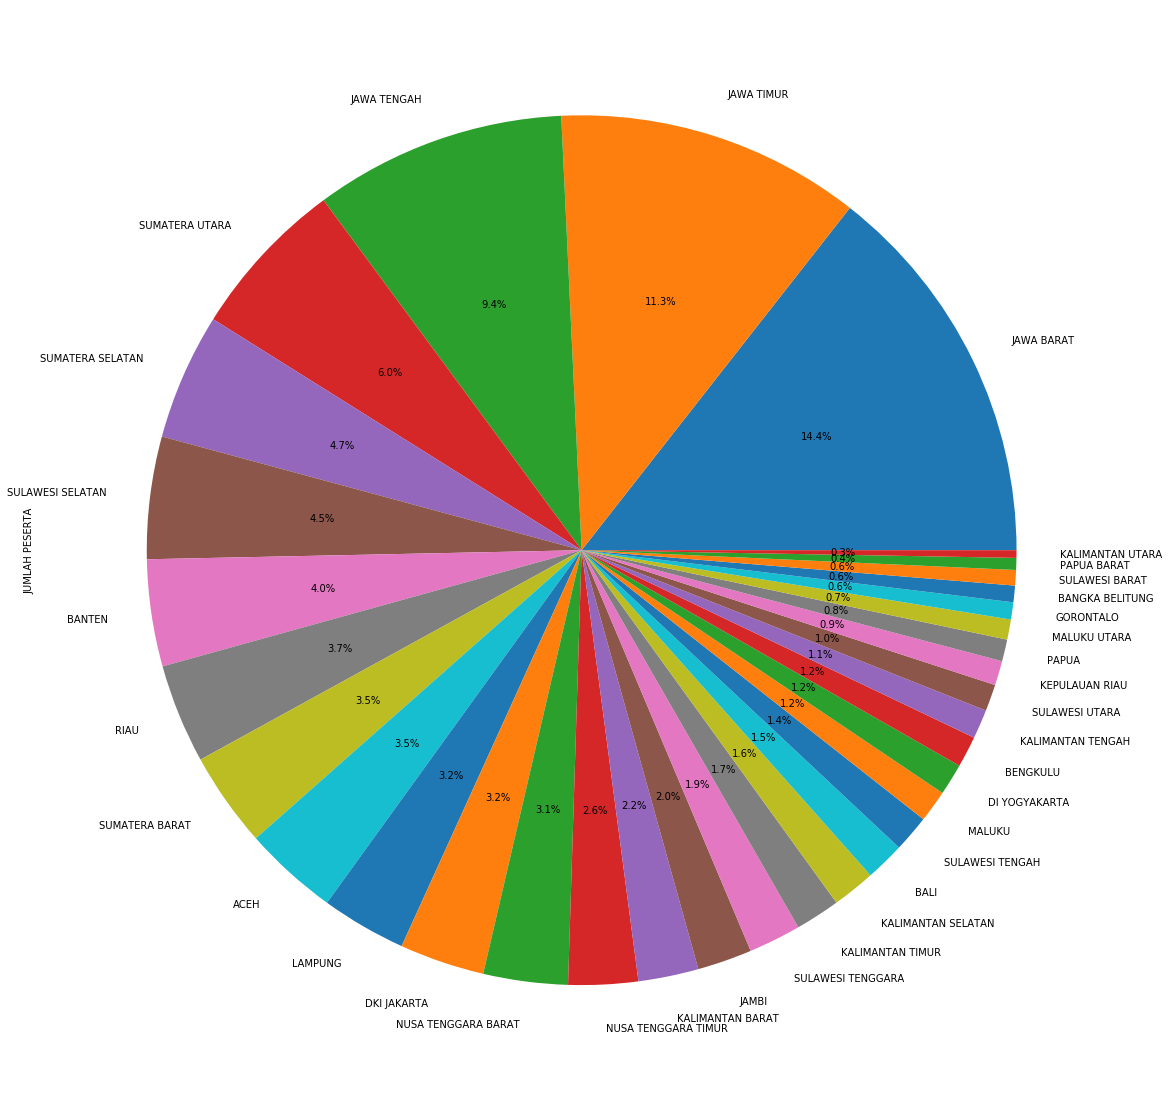

In [95]:
dfpro['JUMLAH PESERTA'] = dfpro['JUMLAH PESERTA'].astype(int)
dfpro.groupby(['NAMA PROVINSI']).mean()['JUMLAH PESERTA'].sort_values(ascending = False).head(34).plot(kind='pie', autopct='%1.1f%%', figsize=(20, 20))

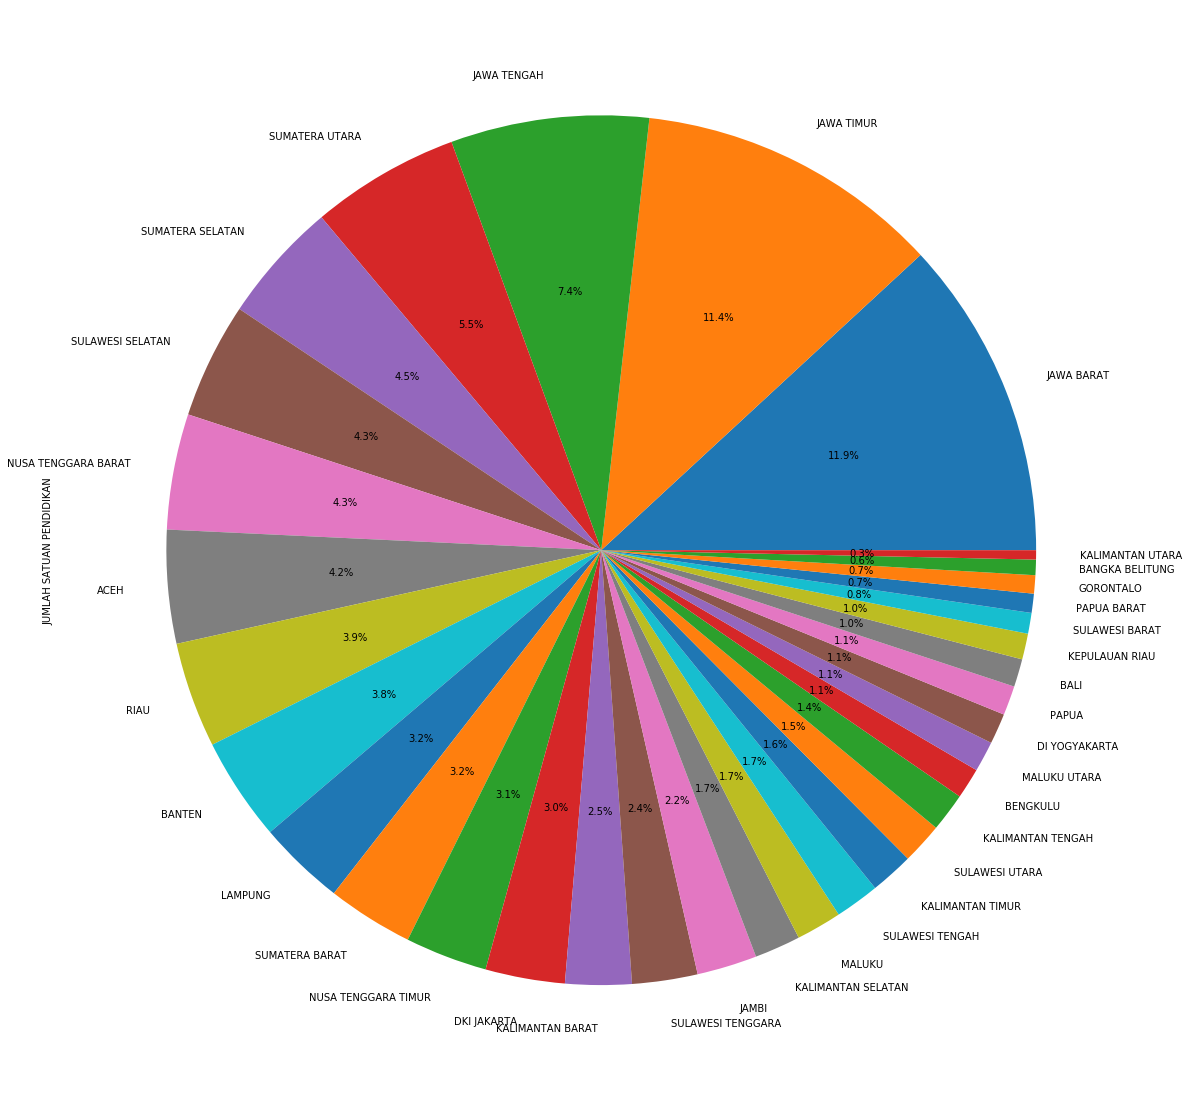

In [92]:
dfpro['JUMLAH SATUAN PENDIDIKAN'] = dfpro['JUMLAH SATUAN PENDIDIKAN'].astype(int)
dfpro.groupby(['NAMA PROVINSI']).mean()['JUMLAH SATUAN PENDIDIKAN'].sort_values(ascending = False).head(34).plot(kind='pie', autopct='%1.1f%%', figsize=(20, 20))

In [96]:
dfpro.head(2)

,NO,KODE,NAMA PROVINSI,JUMLAH SATUAN PENDIDIKAN,JUMLAH PESERTA,BAHASA INDONESIA,BAHASA INGGRIS,MATEMATIKA,RERATA NILAI
1,1.0,1.0,DKI JAKARTA,484,30992,80.17,73.97,52.45,66.90
2,2.0,2.0,JAWA BARAT,1770,146667,70.88,55.23,38.65,53.54


In [99]:
dfpro['density'] = dfpro['JUMLAH PESERTA']/dfpro['JUMLAH SATUAN PENDIDIKAN']

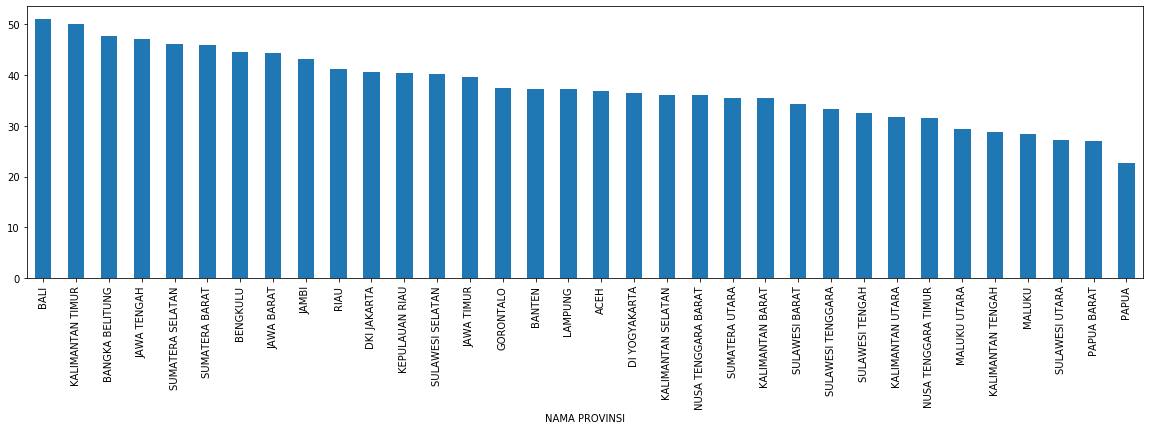

In [107]:
dfpro.groupby(['NAMA PROVINSI']).mean()['density'].sort_values(ascending = False).head(34).plot(kind='bar', figsize=(20, 5))